In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 450kB 50.5MB/s 
     |████████████████████████████████| 3.8MB 53.0MB/s 
     |████████████████████████████████| 81kB 13.5MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

#**Loading Dataset**

In [0]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, optimizers, utils, layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [8]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


# **Preparing the data**

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
    return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# **Building the network**

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# **Compiling the model**

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


## **Training**

In [38]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 118us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9990
Epoch 2/20
7982/7982 [==============================] - 0s 47us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9990
Epoch 3/20
7982/7982 [==============================] - 0s 46us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9990
Epoch 4/20
7982/7982 [==============================] - 0s 45us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9990
Epoch 5/20
7982/7982 [==============================] - 0s 49us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9990
Epoch 6/20
7982/7982 [==============================] - 0s 45us/sample - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9990
Epoch 7/20
7982/7982 [==============================] - 0s 45us/sample - loss: 0.0000e+00 - acc: 1.0000 -

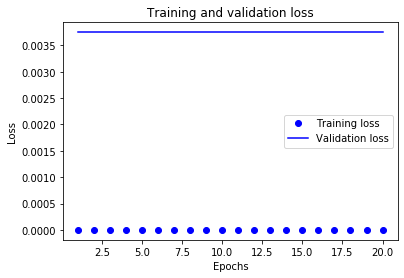

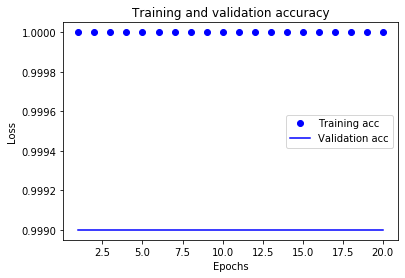

In [39]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
predictions = model.predict(x_test)

In [42]:
predictions

array([[0.02084643, 0.02272298, 0.02265207, ..., 0.02196387, 0.02213689,
        0.01726068],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       ...,
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913]], dtype=float32)

In [43]:
predictions.shape

(2246, 46)

In [44]:
predictions[0]

array([0.02084643, 0.02272298, 0.02265207, 0.02420635, 0.01984429,
       0.02298126, 0.02377759, 0.02395769, 0.01726891, 0.01863669,
       0.01865953, 0.02270756, 0.02042296, 0.02889961, 0.02055301,
       0.02301257, 0.02279832, 0.02424191, 0.01949241, 0.01895262,
       0.02076294, 0.02550576, 0.02626955, 0.02226985, 0.01919306,
       0.01764305, 0.02638127, 0.01874379, 0.02139605, 0.02262584,
       0.02416446, 0.0250045 , 0.01801454, 0.02323498, 0.01915169,
       0.01960145, 0.02229884, 0.02172091, 0.02004973, 0.02159516,
       0.02110733, 0.02352228, 0.02174691, 0.02196387, 0.02213689,
       0.01726068], dtype=float32)

In [45]:
predictions[0].sum()

1.0000001

In [46]:
predictions[0].argmax()

13